# Graph 5: Looping Graph

In [52]:
# imports
from langgraph.graph import StateGraph, START, END
from typing import List, TypedDict
import random

In [53]:
# Agent State Schema
class AgentState(TypedDict):
    """State for the agent."""
    name: str
    nums: List[int]
    counter: int
    final: str

In [54]:
# Node Definitions
def greetings(state: AgentState) -> AgentState:
    """Initial greeting."""
    state['final'] = f"Hello {state['name']}! Let's start counting."
    state['nums'] = []  # Initialize list of numbers
    return state

def count(state: AgentState) -> AgentState:
    """Add a random number to the list and decrement the counter."""
    new_num = random.randint(1, 10)  # Generate a random number between 1 and 10
    state['nums'].append(new_num)  # Add the number to the list
    state['counter'] -= 1  # Decrement the counter
    return state

def stopper(state: AgentState) -> AgentState:
    """Check if the counter has reached zero."""
    return "count_again" if state['counter'] > 0 else "finalize"
    

In [55]:
# Graph Definition
graph = StateGraph(AgentState)

graph.add_node("greeter", greetings)
graph.add_node("count", count)

graph.add_edge(START, "greeter")
graph.add_edge("greeter", "count")

graph.add_conditional_edges(
    "count", # source action
    stopper, # action
    {
        "count_again": "count",
        "finalize": END
    }
)

app = graph.compile()


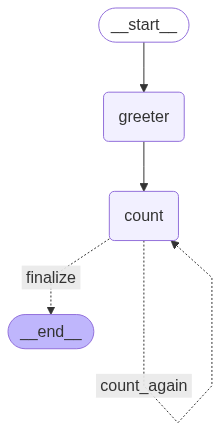

In [56]:
# visualization
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [57]:
example_state = AgentState(name="Banzo", counter=5)
app.invoke(example_state)

{'name': 'Banzo',
 'nums': [10, 8, 1, 6, 8],
 'counter': 0,
 'final': "Hello Banzo! Let's start counting."}